# A Data Exploration of the Titanic Passenger Data

# Introduction

This project aims to analyze and visualize the factors that influenced the survival outcome of passengers on the Titanic. Using data from the Titanic passenger list, we will explore variables such as passenger class, age, gender, fare, and port of embarkation to gain insights into what may have contributed to a passenger's likelihood of survival. By creating visualizations and calculating correlation matrices, we will gain a better understanding of the relationships between these variables and the final survival outcome. This project will help us to understand the events of the Titanic disaster and how they may have impacted the passengers on board.

# Let's code

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Data Cleaning

In [4]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Impute missing values for Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [6]:
# Drop the Cabin column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

In [7]:
# Drop the remaining missing values
df.dropna(inplace=True)

### Data Analysis

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


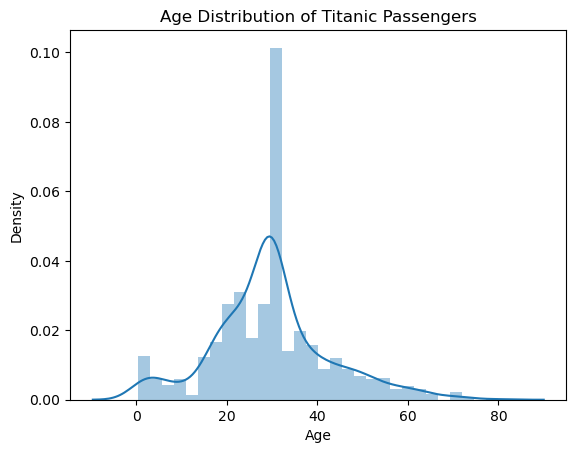

In [21]:
# Plot the distribution of Age
sns.distplot(df['Age'])
plt.title("Age Distribution of Titanic Passengers")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


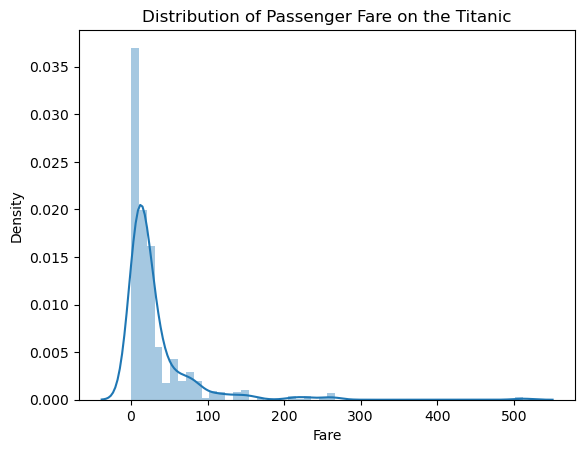

In [20]:
# Plot the distribution of Fare
sns.distplot(df['Fare'])
plt.title("Distribution of Passenger Fare on the Titanic")
plt.show()

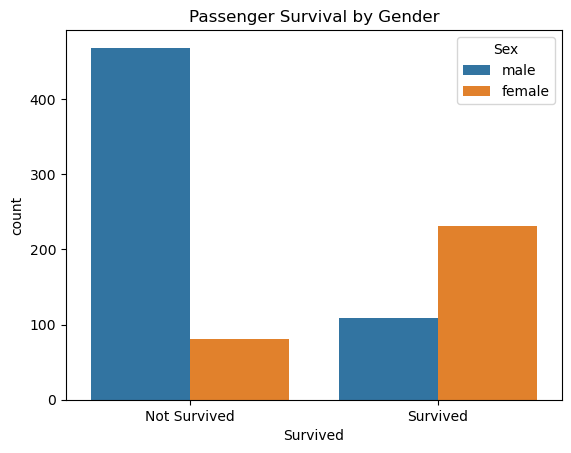

In [19]:
# Plot the survival count by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Passenger Survival by Gender")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

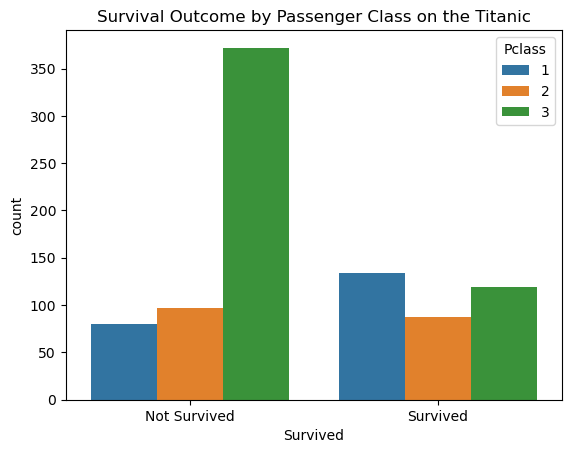

In [23]:
# Plot the survival count by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Outcome by Passenger Class on the Titanic")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

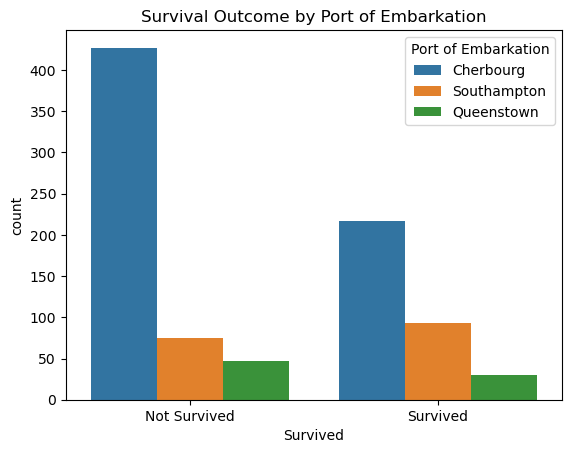

In [30]:
# Plot the survival count by port of embarkation
sns.countplot(x='Survived', hue='Embarked', data=df)    
plt.title("Survival Outcome by Port of Embarkation")
plt.legend(title='Port of Embarkation', labels=['Cherbourg', 'Southampton', 'Queenstown'])
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [31]:
# Get the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088604  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


 ## Final Insights

Age and Fare seem to have a normal distribution.

Women had a higher survival rate compared to men.

Passengers from higher classes had a higher survival rate compared to those from lower classes.

Passengers who embarked from Cherbourg had a higher survival rate compared to those from other ports.

The Fare feature seems to have a strong positive correlation with the Survival feature.